# Classification - Mini-Project 2

## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/telecom_churn.csv')

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check       $29.85/m       $29.85    No  
1               Mailed check       $56.95/m      $1889.5    No  
2               Mailed check       $53.85/m      $108.15   Yes  
3  Bank transfer (automatic)        $42.3/m     $1840.75    No  
4           Electronic check        $70.7/m      $151.65   Yes  

[5 rows x 21 columns]

## Data Inspection

In [ ]:
#checking statistcs of data
df.describe()

SeniorCitizen       tenure
count    7032.000000  7032.000000
mean        0.162400    32.421786
std         0.368844    24.545260
min         0.000000     1.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000

In [ ]:
#to include categorical values in describe
df.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         6976   7032    7032.000000    7032       7032  7032.000000   
unique        6976      2            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3549            NaN    3639       4933          NaN   
mean           NaN    NaN       0.162400     NaN        NaN    32.421786   
std            NaN    NaN       0.368844     NaN        NaN    24.545260   
min            NaN    NaN       0.000000     NaN        NaN     1.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7032          7032            7032           7032  ...   
unique            2             3               3              3  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6352          3385            3096           3497  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7032             7032              7032           7032   
unique               3                2                 4           1584   
top     Month-to-month              Yes  Electronic check       $20.05/m   
freq              3875             4168              2365             61   
mean               NaN              NaN               NaN            NaN   
std                NaN              NaN               NaN            NaN   
min                NaN              NaN               NaN            NaN   
25%                NaN              NaN               NaN            NaN   
50%                NaN              NaN               NaN            NaN   
75%                NaN              NaN               NaN            NaN   
max                NaN              NaN               NaN            NaN   

       TotalCharges Churn  
count          6180  7032  
unique         5783     2  
top           $20.2    No  
freq              8  5163  
mean            NaN   NaN  
std             NaN   NaN  
min             NaN   NaN  
25%             NaN   NaN  
50%             NaN   NaN  
75%             NaN   NaN  
max             NaN   NaN  

[11 rows x 21 columns]

In [ ]:
#checking the data types and null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
#checking missing data
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

Customer ID and TotalCharges are the only two variables with null data

In [ ]:
#checking unique values in each column
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
#checking the number of unique values for each attribute/column
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check       $29.85/m       $29.85    No  
1               Mailed check       $56.95/m      $1889.5    No  
2               Mailed check       $53.85/m      $108.15   Yes  
3  Bank transfer (automatic)        $42.3/m     $1840.75    No  
4           Electronic check        $70.7/m      $151.65   Yes  

[5 rows x 21 columns]

In [ ]:
#checking the count of each value of Churn and checking the if there is imbalance or not
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

MonthlyCharges and TotalCharges have a dollar sign and MonthlyCharges have '/m'

## Data Cleaning

Fixing MonthlyCharges and TotalCharges

In [ ]:
#removing $ sign and '/m' from MonthlyCharges
df['MonthlyCharges']=df['MonthlyCharges'].str.replace('$','')
df['MonthlyCharges']=df['MonthlyCharges'].str.replace('/m','')

<ipython-input-622-484fd8e29bdf>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MonthlyCharges']=df['MonthlyCharges'].str.replace('$','')


In [ ]:
#changing the type of MonthlyCharges from object to float
df['MonthlyCharges']=df['MonthlyCharges'].astype(float)

In [ ]:
#ensuring that the $ sign and '/m' are removed
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7027     84.80
7028    103.20
7029     29.60
7030     74.40
7031    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [ ]:
#ensuring that MonthlyCharges is now of type float
df['MonthlyCharges'].dtypes

dtype('float64')

CustomerID and TotalCharges has missing values

In [ ]:
#dropping customerID as it will has null values and does not affect churn
df=df.drop('customerID',axis=1)

In [ ]:
#ensuring that customerID is dropped
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Will drop TotalCharges as it has missing values and its missing values can be computed from tenure * monthlycharges

In [ ]:
#dropping original totalcharges from df
df=df.drop('TotalCharges',axis=1)

In [ ]:
#computing TotalCharges
df['TotalCharges']=df['tenure']*df['MonthlyCharges']

In [ ]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges Churn  \
0              Yes           Electronic check           29.85    No   
1               No               Mailed check           56.95    No   
2              Yes               Mailed check           53.85   Yes   
3               No  Bank transfer (automatic)           42.30    No   
4              Yes           Electronic check           70.70   Yes   

   TotalCharges  
0         29.85  
1       1936.30  
2        107.70  
3       1903.50  
4        141.40

In [ ]:
#ensuring that there are no missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
TotalCharges        0
dtype: int64

In [ ]:
#checking TotalCharges
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


TotalCharges is now of type float

## Exploratory Data Analysis


**Q1: What are the most correlated attributes with customer churn?**

We will encode the categorical columns to be able to carry out exploratory data analysis (ex: see correlation..etc)

In [ ]:
#finding out the categorical columns
categorical_columns = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_columns.append(column)
print(categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


We did one-hot encoding as the columns are nominal and the number of categories are low

In [ ]:
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=False,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges' 'Churn'
 'TotalCharges']

Number of rows and columns in the dataset: (7032, 20)

Columns in data frame after encoding dummy variable:
 ['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges' 'gender_Female'
 'gender_Male' 'Partner_No' 'Partner_Yes' 'Dependents_No' 'Dependents_Yes'
 'PhoneService_No' 'PhoneService_Yes' 'MultipleLines_No'
 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No' 'OnlineSecurity_No internet service'
 'OnlineSecurity_Yes' 'OnlineBackup_No' 'OnlineBackup_No internet service'
 'OnlineBackup_Yes' 'DeviceProtection_No'
 'DeviceProtection_No internet service' 'DeviceProtec

In [ ]:
corr = df_encode.corr()
corr

SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.015683   
tenure                                        0.015683  1.000000   
MonthlyCharges                                0.219874  0.246862   
TotalCharges                                  0.102665  0.826271   
gender_Female                                 0.001819 -0.005285   
gender_Male                                  -0.001819  0.005285   
Partner_No                                   -0.016957 -0.381912   
Partner_Yes                                   0.016957  0.381912   
Dependents_No                                 0.210550 -0.163386   
Dependents_Yes                               -0.210550  0.163386   
PhoneService_No                              -0.008392 -0.007877   
PhoneService_Yes                              0.008392  0.007877   
MultipleLines_No                             -0.136377 -0.323891   
MultipleLines_No phone service               -0.008392 -0.007877   
MultipleLines_Yes                             0.142996  0.332399   
InternetService_DSL                          -0.108276  0.013786   
InternetService_Fiber optic                   0.254923  0.017930   
InternetService_No                           -0.182519 -0.037529   
OnlineSecurity_No                             0.185145 -0.265987   
OnlineSecurity_No internet service           -0.182519 -0.037529   
OnlineSecurity_Yes                           -0.038576  0.328297   
OnlineBackup_No                               0.087539 -0.314769   
OnlineBackup_No internet service             -0.182519 -0.037529   
OnlineBackup_Yes                              0.066663  0.361138   
DeviceProtection_No                           0.094403 -0.314820   
DeviceProtection_No internet service         -0.182519 -0.037529   
DeviceProtection_Yes                          0.059514  0.361520   
TechSupport_No                                0.205254 -0.264363   
TechSupport_No internet service              -0.182519 -0.037529   
TechSupport_Yes                              -0.060577  0.325288   
StreamingTV_No                                0.048664 -0.246814   
StreamingTV_No internet service              -0.182519 -0.037529   
StreamingTV_Yes                               0.105445  0.280264   
StreamingMovies_No                            0.034196 -0.252890   
StreamingMovies_No internet service          -0.182519 -0.037529   
StreamingMovies_Yes                           0.119842  0.285402   
Contract_Month-to-month                       0.137752 -0.649346   
Contract_One year                            -0.046491  0.202338   
Contract_Two year                            -0.116205  0.563801   
PaperlessBilling_No                          -0.156258 -0.004823   
PaperlessBilling_Yes                          0.156258  0.004823   
PaymentMethod_Bank transfer (automatic)      -0.016235  0.243822   
PaymentMethod_Credit card (automatic)        -0.024359  0.232800   
PaymentMethod_Electronic check                0.171322 -0.210197   
PaymentMethod_Mailed check                   -0.152987 -0.232181   
Churn_No                                     -0.150541  0.354049   
Churn_Yes                                     0.150541 -0.354049   

                                         MonthlyCharges  TotalCharges  \
SeniorCitizen                                  0.219874      0.102665   
tenure                                         0.246862      0.826271   
MonthlyCharges                                 1.000000      0.651458   
TotalCharges                                   0.651458      1.000000   
gender_Female                                  0.013779     -0.000099   
gender_Male                                   -0.013779      0.000099   
Partner_No                                    -0.097825     -0.319032   
Partner_Yes                                    0.097825      0.319032   
Dependents_No                                  0.112343     -0.064867   
Dependents_Yes                                

In [ ]:
#correlation of all attributes with churn
corr['Churn_Yes'].sort_values(ascending=False, key=lambda x: x.abs())

Churn_No                                  -1.000000
Churn_Yes                                  1.000000
Contract_Month-to-month                    0.404565
tenure                                    -0.354049
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
Contract_Two year                         -0.301552
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
TotalCharges                              -0.199675
MonthlyCharg

**Visualization**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5]), <a list of 47 Text major ticklabel objects>)

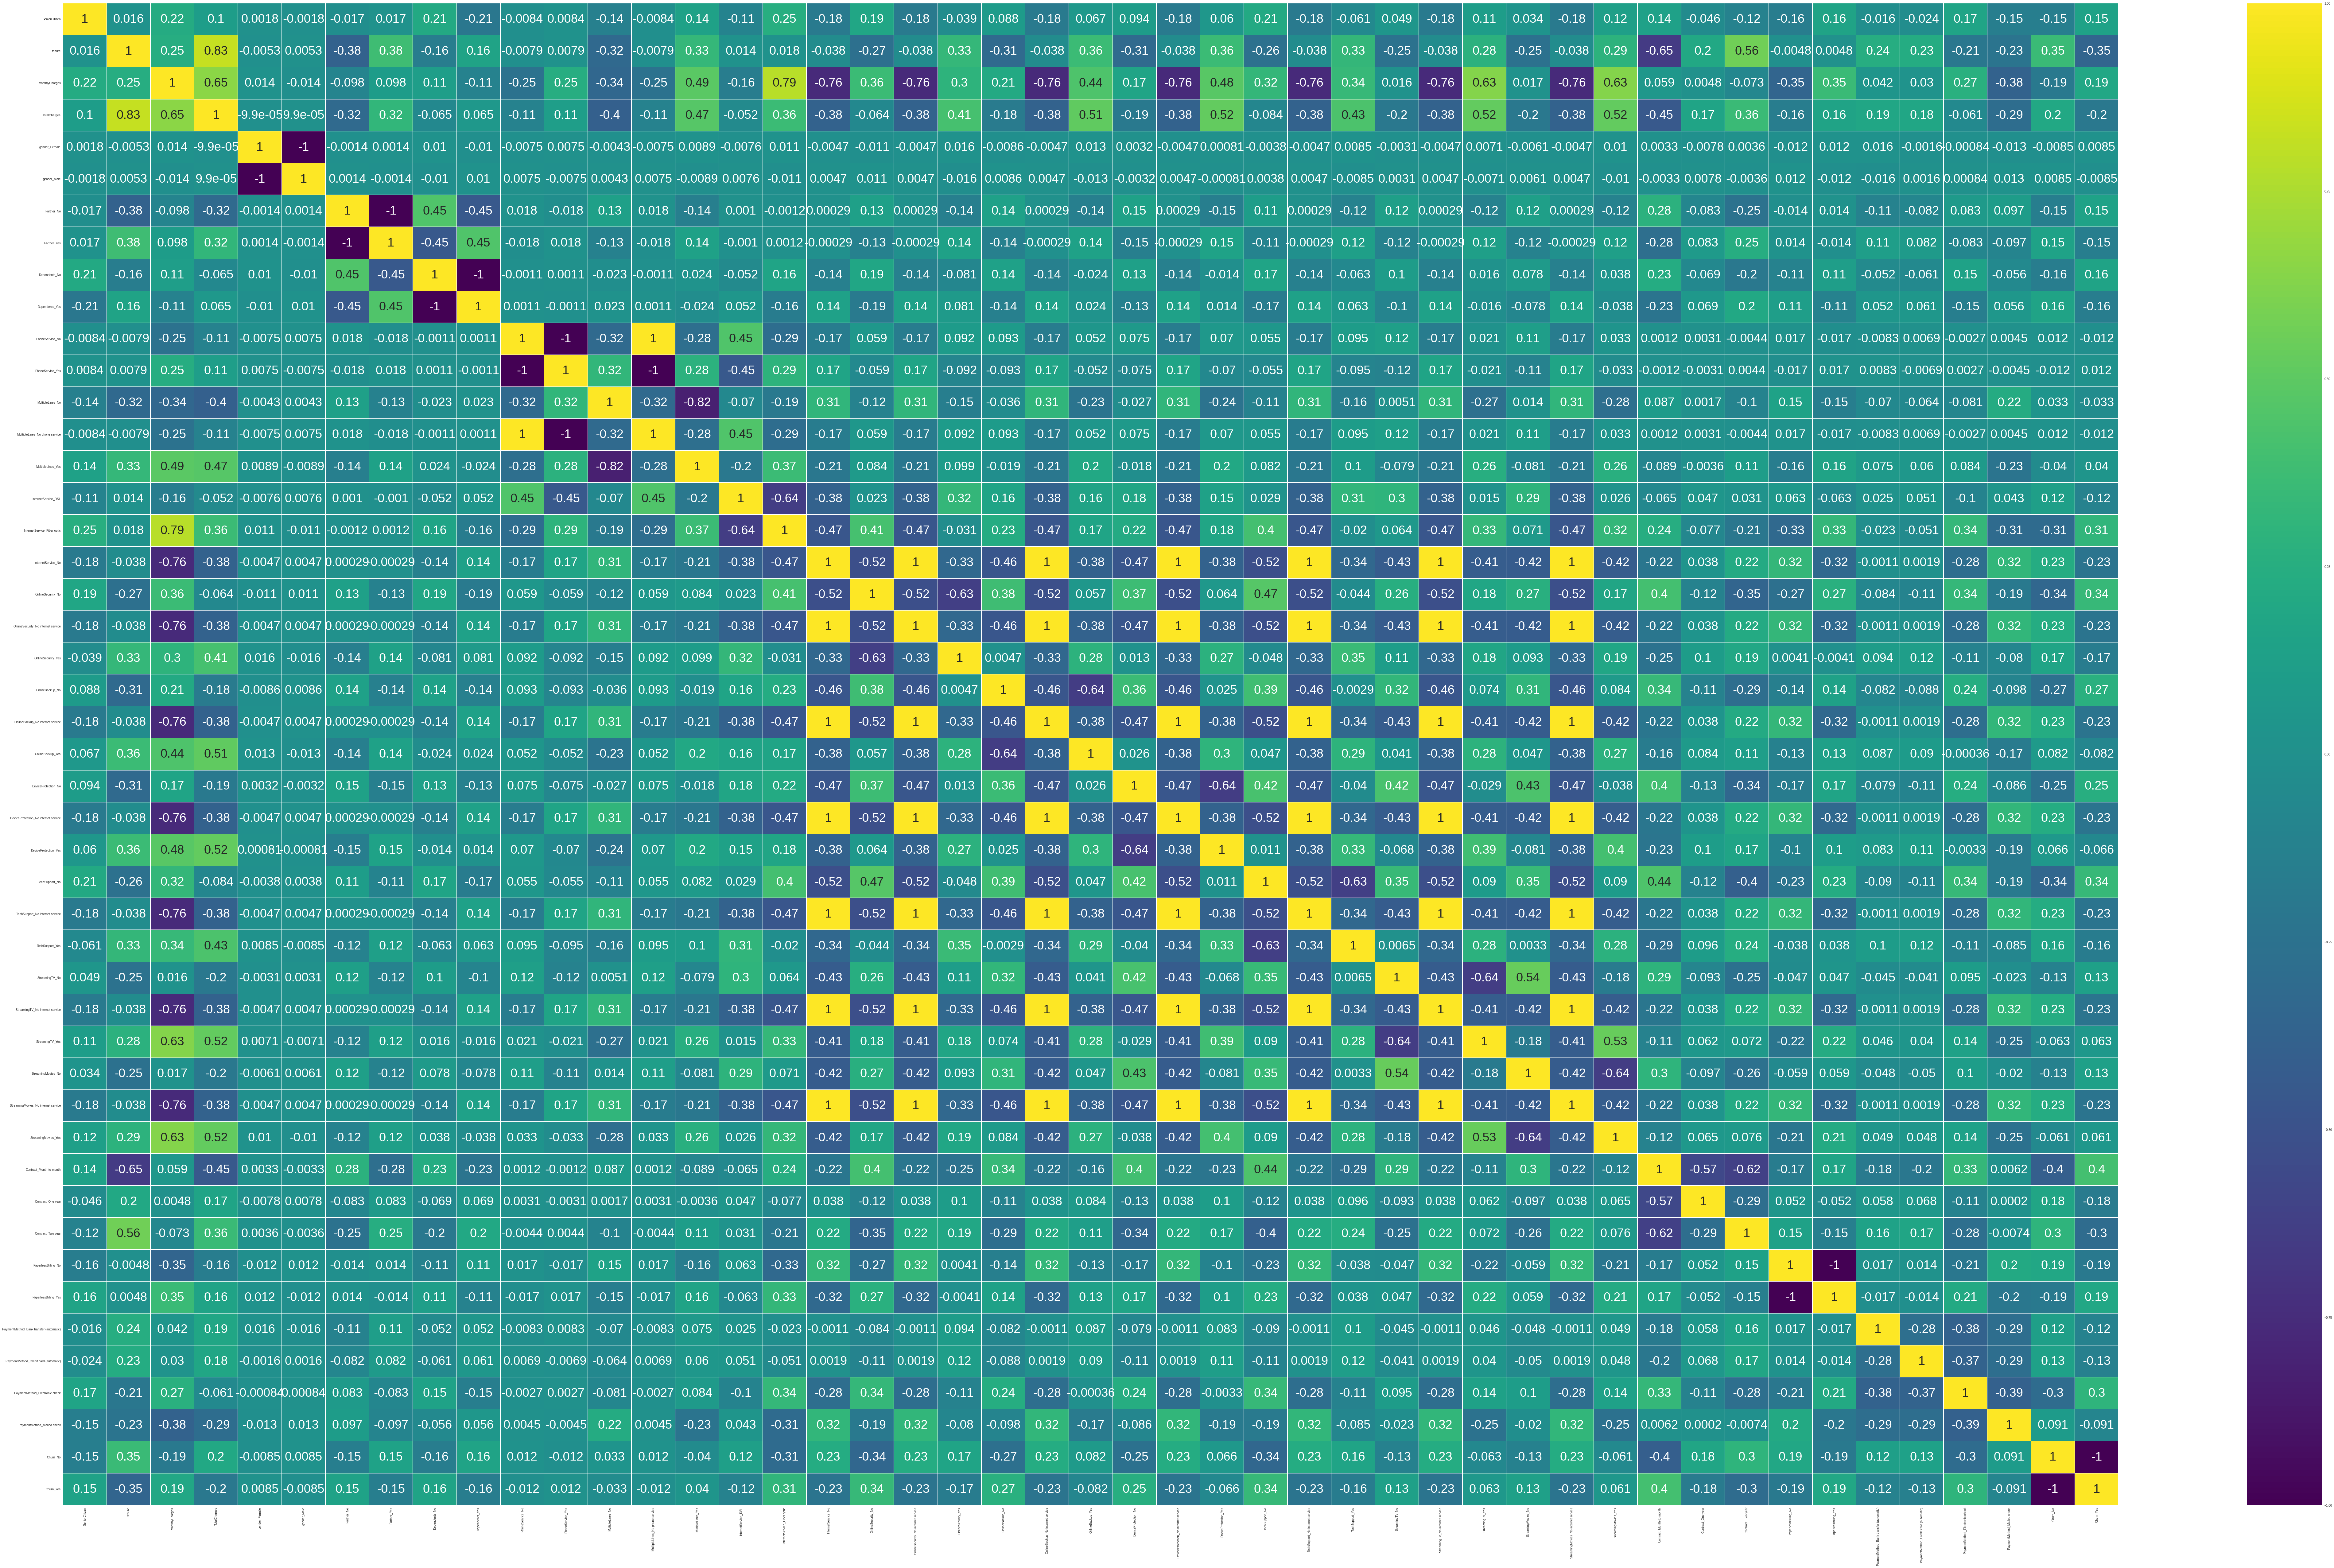

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(150,90))        
sns.heatmap(corr, cmap='viridis', annot=True,annot_kws={"fontsize":40}, linewidths=.5, ax=ax)
plt.xticks(rotation=90)

**Answer for Q1**: The most correlated attributes with churn are 

Contract_Month-to-month                 tenure                                   
OnlineSecurity_No                          
TechSupport_No                            
InternetService_Fiber optic               
Contract_Two year                         
PaymentMethod_Electronic check

**Q2: Which payment method has the highest churn rate?**

In [ ]:
#performing one-hot enoding for churn
df_copy = pd.get_dummies(data=df,
                           columns=['Churn'],
                           drop_first=False,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_copy.columns.values)
print('\nNumber of rows and columns in the dataset:',df_copy.shape)

Columns in original data frame:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges' 'Churn'
 'TotalCharges']

Number of rows and columns in the dataset: (7032, 20)

Columns in data frame after encoding dummy variable:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn_No' 'Churn_Yes']

Number of rows and columns in the dataset: (7032, 21)


**Visualization**

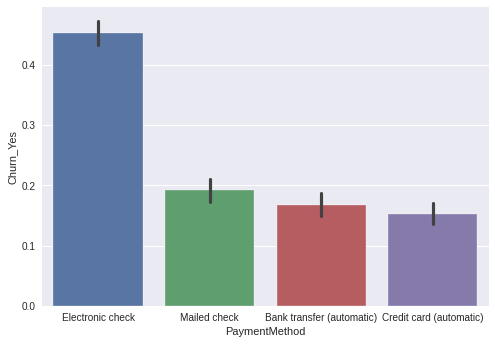

In [ ]:
sns.barplot(data=df_copy, x='PaymentMethod', y='Churn_Yes')


**Answer for Q2**: Electronic check is the payment method that has the highest churn rate

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

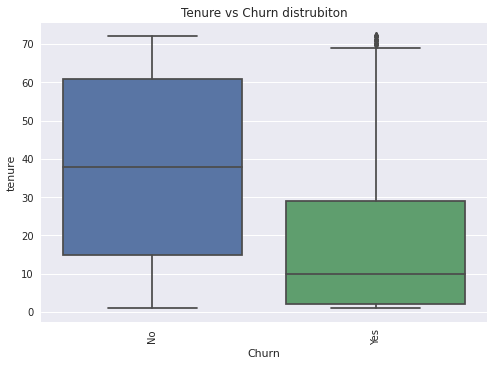

In [ ]:
sns.boxplot(data=df, x='Churn',y='tenure').set(title='Tenure vs Churn distrubiton')
plt.xticks(rotation=90)
plt.tight_layout 
plt.figsize=(50,250)
sns.set(font_scale=1)

In [ ]:
df_copy.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges     Churn_No  \
count    7032.000000  7032.000000     7032.000000   7032.000000  7032.000000   
mean        0.162400    32.421786       64.798208   2283.147248     0.734215   
std         0.368844    24.545260       30.085974   2264.703327     0.441782   
min         0.000000     1.000000       18.250000     18.800000     0.000000   
25%         0.000000     9.000000       35.587500    397.800000     0.000000   
50%         0.000000    29.000000       70.350000   1394.575000     1.000000   
75%         0.000000    55.000000       89.862500   3791.250000     1.000000   
max         1.000000    72.000000      118.750000   8550.000000     1.000000   

         Churn_Yes  
count  7032.000000  
mean      0.265785  
std       0.441782  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

**Answer for Q3**: After 10 months, customers commonly churn.

BASED ON the visualization: After 2 months, 25% (which is the lower quartile) of the customers are more commonly to churn. At 10 months, 50% (which is the median) of the customers are likely to churn, finally at 30 months, 75% (which is the upper quartile) of the customers churn.

BASED ON .describe(): After 9 months, 25% (which is the lower quartile) of the customers are more commonly to churn. At 29 months, 50% (which is the median) of the customers are likely to churn, finally at 55 months, 75% (which is the upper quartile) of the customers churn.

## Data Preparation for Modelling

In [ ]:
#finding out the categorical columns
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
print(categorical_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
#we will remove churn and contract from the categorical_col list to avoid it getting encoded
categorical_col.remove('Churn')
categorical_col.remove('Contract')

We did label encoding as contract has Month-to-Month, one year and two year which can be considered as ordinal, and number if categories are more than two. Moreover, we did label encoding for Churn as it has yes or no, which makes it suitable to use label encoding as it used for such examples.

In [ ]:
#label encoding for churn and contract
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Churn']= label_encoder.fit_transform(df['Churn'])
df['Contract']= label_encoder.fit_transform(df['Contract'])



We will perform one-hot encoding as it will not provide ranking as in label encoding, moreover, the columns are nominal and not ordinal.

In [ ]:
#one-hot encoding
df_encode = pd.get_dummies(data=df,
                           columns=categorical_col,
                           drop_first=False,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges' 'Churn'
 'TotalCharges']

Number of rows and columns in the dataset: (7032, 20)

Columns in data frame after encoding dummy variable:
 ['SeniorCitizen' 'tenure' 'Contract' 'MonthlyCharges' 'Churn'
 'TotalCharges' 'gender_Female' 'gender_Male' 'Partner_No' 'Partner_Yes'
 'Dependents_No' 'Dependents_Yes' 'PhoneService_No' 'PhoneService_Yes'
 'MultipleLines_No' 'MultipleLines_No phone service' 'MultipleLines_Yes'
 'InternetService_DSL' 'InternetService_Fiber optic' 'InternetService_No'
 'OnlineSecurity_No' 'OnlineSecurity_No internet service'
 'OnlineSecurity_Yes' 'OnlineBackup_No' 'OnlineBackup_No internet service'
 'OnlineBackup_Yes' 'DeviceProtection_No'
 'DeviceProtection_No internet ser

In [ ]:
#copying df_encode to the original dataframe named df
df=df_encode.copy()

In [ ]:
#dropping gender_Male as the gender_Male depends on gender_Female and can be deduced from gender_Female, thus avoiding redundancy
df=df.drop('gender_Male',axis=1)

We previously dropped CustomerID as it had missing values, and will not affect or has any relationship with churn. However, we will not drop anymore columns as the decision tree has attribution selection method which it can decide which columns or attributes are important or not.

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph

**Decision tree splitting**
Starting from the root, the tree is split based on contract and the conditon is if less than or equal to 0.5. If the contract is greater than 0.5, we will move to the right where it is split based on if MonthlyCharges ≤ 93.675. If MonthlyCharges is equal to 93.675, we move downwards where the splitting is done based on Contract ≤ 1.5, then if the contract is more than 1.5, the we will continue to the right where the splitting is done on MonthlyCharges ≤ 94.2, where if it is not MonthlyCharges ≤ 94.2 we move either downwards in the middle or to the right where the splitting continues on different attributes.

The gini that is present in the decision tree model is one of the ways and methods to split decision tree. The gini here is used to indicate the probablity that there is a misclassification by a node for an example.

A gini of 1 means that there is only one class. Meanwhile, a gini of 0 means that elements belong to same class. If the gini is 0.5, it indicates uniform distribution among all classes.

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.84%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998066     0.999232  0.998375     0.998649      0.998376
recall        0.999723     0.994648  0.998375     0.997186      0.998375
f1-score      0.998894     0.996935  0.998375     0.997914      0.998373
support    3614.000000  1308.000000  0.998375  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   7 1301]]

Test Result:
Accuracy Score: 72.32%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.814332    0.480000  0.723223     0.647166      0.725441
recall        0.806972    0.491979  0.723223     0.649475      0.723223
f1-score      0.810636    0.485915  0.723223     0.648276      0.724300
support    1549.000000  561.000000  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


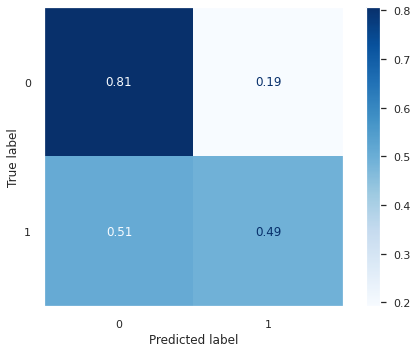

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_clf, X_test, y_test, cmap='Blues', normalize='true')
plt.grid(False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.48
Recall:  0.4919786096256685
F1_score:  0.4859154929577465


Since we have 5163 no for churn and 1869 yes for churn, this indicates class imbalance, so it will not be suitable to use accuracy as a performance metric, therefore, we will focus on Precision, Recall and F1_score.

Precision metric is the (True Positive/(True Positive+False Positive)) it indicates what percentage is truly positive, out of all the positive predicted. The higher the precision the better the model. We have a precision of 0.48 which is average precision.

Recall metric is the proportion of positive observations to all positive observations. The higher the recall the better the model. We have a recall of 0.49, which is almost 0.5, however, we can say that it is moderate.

F1_score is the weighted average of precision and recall. F1_score is considered more important than accuracy for imbalanced classes. F1_score is 2*(Recall * Precision) / (Recall + Precision). The closer the F1_score to 1, the better the model. However our F1_score is 0.48 which is moderate.

Overall, the values of precision, recall and f1_score indicate that our model needs more improvements escpeically in case of precision and recall where it increases more than 0.5, and also trying to get f1_score closer to 1. Therefore, a different model can be used to get better results.

## Bonus (Optional)